AVL

In [1]:
# AVL tree implementation in Python
 
import sys
 
# Create a tree node
class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
 
 
class AVLTree(object):
 
 
    def find(self, root, key):
        while root:
            if root.key == key:
                print("Found")
                break
            root = root.right if root.key < key else root.left
        return root
 
    # Function to insert a node
    def insert_node(self, root, key):
 
        # Find the correct location and insert the node
        if not root:
            return TreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)
 
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
 
        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
 
        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
 
        return root
 
    # Function to delete a node
    def delete_node(self, root, key):
 
        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root
 
        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
 
        balanceFactor = self.getBalance(root)
 
        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root
 
    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y
 
    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y
 
    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height
 
    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)
 
    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)
 
    # def preOrder(self, root):
    #     if not root:
    #         return
    #     print("{0} ".format(root.key), end="")
    #     self.preOrder(root.left)
    #     self.preOrder(root.right)
 
    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.key)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)
 
 
myTree = AVLTree()
root = None
nums = [33, 13, 52, 9, 21, 61, 8, 11]
for num in nums:
    root = myTree.insert_node(root, num)
myTree.printHelper(root, "", True)
key = 13
root = myTree.delete_node(root, key)
print("After Deletion: ")
myTree.printHelper(root, "", True)
 
myTree.find(root, 21)

R----33
     L----13
     |    L----9
     |    |    L----8
     |    |    R----11
     |    R----21
     R----52
          R----61
After Deletion: 
R----33
     L----9
     |    L----8
     |    R----21
     |         L----11
     R----52
          R----61
Found


T- Tree

In [2]:
# T tree implementation in Python
 
import sys
 
minSize = 2
maxSize = 3
 
# Create a tree node
class TreeNode(object):
    def __init__(self, key):
        self.keys = [key]
        self.minKey = key
        self.maxKey = key
        self.left = None
        self.right = None
        self.height = 1
 
class TTree(object):
 
 
    def find(self, root, key):
        while root:
            if root.minKey <= key and key >= root.maxKey:
                if key in root.keys:
                    print("Found")
                else:
                    print("Not found")
                break
            root = root.right if root.maxKey < key else root.left
        return root
 
    # Function to insert a node
    def insert_node(self, root, key):
 
        # Find the correct location and insert the node
        if not root:
            return TreeNode(key)
 
        node = self.search_bounding(root, key)
 
        if len(node.keys) < maxSize:
            node.keys.append(key)
            node.keys.sort();
            node.minKey = min(node.keys)
            node.maxKey = max(node.keys)
        else:
            node.keys.append(key)
            node.keys = node.keys[1:]
            node.keys.sort();
            removedMin = node.minKey
            node.minKey = min(node.keys)
            node.maxKey = max(node.keys)
            node.left = self.insert_node(node.left, removedMin)
            key = removedMin
 
        node.height = 1 + max(self.getHeight(node.left),
                              self.getHeight(node.right))
 
        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
 
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 1:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
 
        if balanceFactor < -1:
            if self.getBalance(root.right) <= -1:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
 
        return root
 
    def search_bounding(self, root, key):
        if not root:
            return None
        elif root.minKey <= key and key <= root.maxKey:
            return root
        elif key < root.minKey:
            found = self.search_bounding(root.left, key)
        elif key > root.maxKey:
            found = self.search_bounding(root.right, key)
        if not found:
            return root
        else:
            return found
 
#     # Function to delete a node
#     def delete_node(self, root, key):
 
#         # Find the node to be deleted and remove it
#         if not root:
#             return root
#         elif key < root.key:
#             root.left = self.delete_node(root.left, key)
#         elif key > root.key:
#             root.right = self.delete_node(root.right, key)
#         else:
#             if root.left is None:
#                 temp = root.right
#                 root = None
#                 return temp
#             elif root.right is None:
#                 temp = root.left
#                 root = None
#                 return temp
#             temp = self.getMinValueNode(root.right)
#             root.key = temp.key
#             root.right = self.delete_node(root.right,
#                                           temp.key)
#         if root is None:
#             return root
 
#         # Update the balance factor of nodes
#         root.height = 1 + max(self.getHeight(root.left),
#                               self.getHeight(root.right))
 
#         balanceFactor = self.getBalance(root)
 
#         # Balance the tree
#         if balanceFactor > 1:
#             if self.getBalance(root.left) >= 0:
#                 return self.rightRotate(root)
#             else:
#                 root.left = self.leftRotate(root.left)
#                 return self.rightRotate(root)
#         if balanceFactor < -1:
#             if self.getBalance(root.right) <= 0:
#                 return self.leftRotate(root)
#             else:
#                 root.right = self.rightRotate(root.right)
#                 return self.leftRotate(root)
#         return root
 
    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y
 
    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y
 
    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height
 
    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)
 
#     def getMinValueNode(self, root):
#         if root is None or root.left is None:
#             return root
#         return self.getMinValueNode(root.left)
 
#     def preOrder(self, root):
#         if not root:
#             return
#         print("{0} ".format(root.key), end="")
#         self.preOrder(root.left)
#         self.preOrder(root.right)
 
    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.keys)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)
 
myTree = TTree()
root = None
nums = [33, 13, 52, 9, 21, 61, 8, 11]
nums = [1,2,3,4,5,6,100,222,333,444,555,33, 13, 52, 9, 21, 61, 8, 11]
for num in nums:
    root = myTree.insert_node(root, num)
    myTree.printHelper(root, "", True)
    sys.stdout.write('\n')
 
key = 13
# root = myTree.delete_node(root, key)
print("After Deletion: ")
myTree.printHelper(root, "", True)
 
# myTree.find(root, 21)

R----[1]

R----[1, 2]

R----[1, 2, 3]

R----[2, 3, 4]
     L----[1]

R----[3, 4, 5]
     L----[1, 2]

R----[4, 5, 6]
     L----[1, 2, 3]

R----[2, 3, 4]
     L----[1]
     R----[5, 6, 100]

R----[2, 3, 4]
     L----[1]
     R----[6, 100, 222]
          L----[5]

R----[2, 3, 4]
     L----[1]
     R----[100, 222, 333]
          L----[5, 6]

R----[2, 3, 4]
     L----[1]
     R----[222, 333, 444]
          L----[5, 6, 100]

R----[6, 100, 222]
     L----[2, 3, 4]
     |    L----[1]
     |    R----[5]
     R----[333, 444, 555]

R----[33, 100, 222]
     L----[2, 3, 4]
     |    L----[1]
     |    R----[5, 6]
     R----[333, 444, 555]

R----[33, 100, 222]
     L----[2, 3, 4]
     |    L----[1]
     |    R----[5, 6, 13]
     R----[333, 444, 555]

R----[52, 100, 222]
     L----[2, 3, 4]
     |    L----[1]
     |    R----[6, 13, 33]
     |         L----[5]
     R----[333, 444, 555]

R----[52, 100, 222]
     L----[2, 3, 4]
     |    L----[1]
     |    R----[9, 13, 33]
     |         L----[5, 6]
  

Consistent Hashing

In [2]:
import requests

class StorageNode:
    def __init__(self, name=None, host=None):
        self.name = name
        self.host = host
        self.storage = []
        
    def fetch_file(self, path):
        return requests.get(f'https://{self.host}:1231/{path}').text
    
    def put_file(self, path):
        with open(path, 'r') as fp:
            content = fp.read()
            return requests.post(f'https://{self.host}:1231/{path}', body=content).text
    
    def put_storage(self,id,key):
        self.storage.append([id,key])

In [7]:
import hashlib
from typing import Union
from bisect import bisect, bisect_left, bisect_right

In [8]:

def hash_fn(key: str, total_slots: int) -> int:
    """hash_fn creates an integer equivalent of a SHA256 hash and
    takes a modulo with the total number of slots in hash space.
    """
    hsh = hashlib.sha256()

    # converting data into bytes and passing it to hash function
    hsh.update(bytes(key.encode('utf-8')))

    # converting the HEX digest into equivalent integer value
    return int(hsh.hexdigest(), 16) % total_slots

In [126]:
class ConsistentHash:
    """ConsistentHash represents an array based implementation of
    consistent hashing algorithm.
    """

    def __init__(self,slots):
        self._keys = []           # indices taken up in the ring
        self.nodes = []           # nodes present in the ring. nodes[i] is present at index keys[i]
        self.total_slots = slots     # total slots in the ring

    def add_node(self, node: StorageNode) -> int:
        """add_node function adds a new node in the system and returns the key
        from the hash space where it was placed
        """

        # handling error when hash space is full.
        if len(self._keys) == self.total_slots:
            raise Exception("hash space is full")

        key = hash_fn(node.host, self.total_slots)

        # find the index where the key should be inserted in the keys array
        # this will be the index where the Storage Node will be added in the
        # nodes array.
        index = bisect(self._keys, key)

        # if we have already seen the key i.e. node already is present
        # for the same key, we raise Collision Exception
        if index > 0 and self._keys[index - 1] == key:
            raise Exception("collision occurred")

        # insert the node_id and the key at the same `index` location.
        # this insertion will keep nodes and keys sorted w.r.t keys.
        self.nodes.insert(index, node)
        self._keys.insert(index, key)

        return key

    def remove_node(self, node: StorageNode) -> int:
        """remove_node removes the node and returns the key
        from the hash space on which the node was placed.
        """

        # handling error when space is empty
        if len(self._keys) == 0:
            raise Exception("hash space is empty")

        key = hash_fn(node.host, self.total_slots)

        # we find the index where the key would reside in the keys
        index = bisect_left(self._keys, key)

        # if key does not exist in the array we raise Exception
        if index >= len(self._keys) or self._keys[index] != key:
            raise Exception("node does not exist")

        # now that all sanity checks are done we popping the
        # keys and nodes at the index and thus removing presence of the node.
        self._keys.pop(index)
        self.nodes.pop(index)

        return key

    def assign(self, item: str) -> str:
        """Given an item, the function returns the node it is associated with.
        """
        key = hash_fn(item, self.total_slots)

        # we find the first node to the right of this key
        # if bisect_right returns index which is out of bounds then
        # we circle back to the first in the array in a circular fashion.
        index = bisect_right(self._keys, key) % len(self._keys)

        # return the node present at the index
        return self.nodes[index]

In [136]:
def search_cons(ch,od,do,total):
    wynik = []
    used = []
    for i in range(od,do):
        temp = ch.assign(str(i))
        if temp not in used:
            used.append(temp)
            for j in temp.storage:
                if j[1] >=od and j[1] <= do:
                    pass
                    wynik.append(j[1])
    #return(wynik)

In [151]:
def search_begin(input_data,search):
    storage_nodes = []
    for i in range(40):
        storage_nodes.append(StorageNode(name=str(i*1000000),host=str(i*1000000+1)))
    ch = ConsistentHash(len(input_data))
    for i in storage_nodes:
        ch.add_node(i)
    for i in range(len(input_data)):
        ch.assign(str(input_data[i])).put_storage(i,input_data[i])
    start = time.time_ns()
    search_cons(ch,21,35,len(input_data))
    duration = time.time_ns() - start
    return(duration)

In [67]:
# storage_nodes holding instances of actual storage node objects
storage_nodes = [
    StorageNode(name='A', host='239.67.52.72'),
    StorageNode(name='B', host='137.70.131.229'),
    StorageNode(name='C', host='98.5.87.182'),
    StorageNode(name='D', host='11.225.158.95'),
    StorageNode(name='E', host='203.187.116.210'),
    StorageNode(name='F', host='107.117.238.203'),
    StorageNode(name='G', host='27.161.219.131'),
]
ch = ConsistentHash(50)
for i in storage_nodes:
    ch.add_node(i)
nums = [1,2,3,4,5,6,7,99,303,15]
for i in range(len(nums)):
    ch.assign(str(nums[i])).put_storage(i,nums[i])

In [45]:
search(ch,5,10,50)

[5, 6, 7]

In [152]:
import random
import time
import matplotlib.pyplot as plt
x = []
conshash = []
for i in range(10000,90000,10000): #[13000]
    input_data = [j for j in range(0,i)] 
    
    search = random.sample(input_data, 2000)#int(i/10))
    x.append(i)
    conshash.append(search_begin(input_data,search))


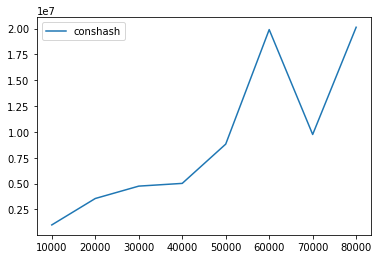

In [153]:
plt.plot(x,conshash, label = "conshash")
plt.legend()
plt.show()

In [ ]:
def search_one()